<a href="https://colab.research.google.com/github/duyqu-chan/CRM-Analytics/blob/master/Gratis_DC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CRM Analytics: Gratis Case Study

  Gratis sell products in various categories. The representative data that  contains the shopping details made from *Hair* category. The aim of this project is to analyze the derived representative data and prepare new campaign proposals and campaign ideas to the marketing department of A brand.

  Expectation of brand A:
+ To get insight about their own business processes.
+ To gain new customers, to retain the existing customers and churn the possibility of losing customers to see the strategies through the phenomenon.


## Dataset Exploration

Mount Google drive to upload the data.

In [90]:
# Run this cell to mount your Google Drive.
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Let's start by reading the data and observe values.

In [91]:
import pandas as pd
df = pd.read_csv("/content/drive/My Drive/Gratis/RETAIL_TRX_DATA.csv")
df.head()

,CUST_ID,RTL_TRANS_ID,TRX_DATE,ITEM_QUANTITY,ITEM_UNIT_PRICE,ITEM_ID,BRAND_NAME,FIRST_TRANS_DATE,LAST_TRANS_DATE
0,10000,01128000022018120817086098,08DEC2018:17:08:38.000000,1.0,15.70,10140396,DIGER,28OCT2017:15:00:00,10AUG2019:15:00:00
1,1000000,01205000032019062317593178,23JUN2019:17:59:19.000000,1.0,14.95,10167618,DIGER,01OCT2017:15:00:00,08AUG2019:15:00:00
2,1000001,01042000032018101716332124,17OCT2018:16:33:12.000000,1.0,17.90,10063960,DIGER,21OCT2017:15:00:00,20JUL2019:15:00:00
3,1000004,01133000012018042115556158,21APR2018:15:55:39.000000,3.0,6.90,10013901,DIGER,07OCT2017:15:00:00,27AUG2019:15:00:00
4,1000004,01133000022017110614467148,06NOV2017:14:46:44.000000,1.0,24.90,12000154,DIGER,07OCT2017:15:00:00,27AUG2019:15:00:00


We have 1731641 instances with 9 features in the dataset. The description of the columns are:
Data Description:
1. **CUST_ID:** Represents the unique customer number assigned to each customer.
2. **RTL_TRANS_ID:** Represents the transaction number assigned to each transaction.
3. **TRX_DATE:** Provides the date of the transaction.
4. **ITEM_QUANTITY:** It gives the quantity information of the related product purchased.
5. **ITEM_UNIT_PRICE:** Represents the price of the purchased product.
6. **ITEM_ID:** The product id representing the product.
7. **BRAND_NAME:** The brand name of the purchased product. (A brand and Other)
8. **FIRST_TRANS_DATE:** Gives the first shopping date in Gratis.
9. **LAST_TRANS_DATE:** Returns the last shopping date in Gratis.


** TRX_DATE gives the sales date of the related product. FIRST_TRANS_DATE / LAST_TRANS_DATE The first and last exchange in Gratis.

In [92]:
df.shape

(1731641, 9)

There are no duplicates, all rows are unique in the dataset.

In [93]:
df.duplicated().any()

False

When we checked the datatypes we saw that date related columns are encoded in the wrong format and converted them to date-time objects.

In [94]:
df.dtypes

CUST_ID               int64
RTL_TRANS_ID         object
TRX_DATE             object
ITEM_QUANTITY       float64
ITEM_UNIT_PRICE     float64
ITEM_ID               int64
BRAND_NAME           object
FIRST_TRANS_DATE     object
LAST_TRANS_DATE      object
dtype: object

In [95]:
df['TRX_DATE'] = pd.to_datetime(df['TRX_DATE'], format='%d%b%Y:%H:%M:%S.%f')
df['FIRST_TRANS_DATE'] = pd.to_datetime(df['FIRST_TRANS_DATE'], format='%d%b%Y:%H:%M:%S')
df['LAST_TRANS_DATE'] = pd.to_datetime(df['LAST_TRANS_DATE'], format='%d%b%Y:%H:%M:%S')
df.head()               

,CUST_ID,RTL_TRANS_ID,TRX_DATE,ITEM_QUANTITY,ITEM_UNIT_PRICE,ITEM_ID,BRAND_NAME,FIRST_TRANS_DATE,LAST_TRANS_DATE
0,10000,01128000022018120817086098,2018-12-08 17:08:38,1.0,15.70,10140396,DIGER,2017-10-28 15:00:00,2019-08-10 15:00:00
1,1000000,01205000032019062317593178,2019-06-23 17:59:19,1.0,14.95,10167618,DIGER,2017-10-01 15:00:00,2019-08-08 15:00:00
2,1000001,01042000032018101716332124,2018-10-17 16:33:12,1.0,17.90,10063960,DIGER,2017-10-21 15:00:00,2019-07-20 15:00:00
3,1000004,01133000012018042115556158,2018-04-21 15:55:39,3.0,6.90,10013901,DIGER,2017-10-07 15:00:00,2019-08-27 15:00:00
4,1000004,01133000022017110614467148,2017-11-06 14:46:44,1.0,24.90,12000154,DIGER,2017-10-07 15:00:00,2019-08-27 15:00:00


Let's get the dataframe info as follows:

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1731641 entries, 0 to 1731640
Data columns (total 9 columns):
CUST_ID             int64
RTL_TRANS_ID        object
TRX_DATE            datetime64[ns]
ITEM_QUANTITY       float64
ITEM_UNIT_PRICE     float64
ITEM_ID             int64
BRAND_NAME          object
FIRST_TRANS_DATE    datetime64[ns]
LAST_TRANS_DATE     datetime64[ns]
dtypes: datetime64[ns](3), float64(2), int64(2), object(2)
memory usage: 118.9+ MB


Miracolusly there are no missing variables in any of the columns.

In [97]:
df.isnull().any()

CUST_ID             False
RTL_TRANS_ID        False
TRX_DATE            False
ITEM_QUANTITY       False
ITEM_UNIT_PRICE     False
ITEM_ID             False
BRAND_NAME          False
FIRST_TRANS_DATE    False
LAST_TRANS_DATE     False
dtype: bool

There is no non-negative price, as expected.

In [98]:
len(df[df.ITEM_UNIT_PRICE < 0])

0

There is no non-negative or zero item quantity, as expected.

In [99]:
len(df[df.ITEM_QUANTITY <= 0])

0

## Insights and Visualization

An average customer buys one item in one transaction. Mean unit price is 1.38 TRY (std = 7.84 TRY).

In [100]:
df.describe()

,CUST_ID,ITEM_QUANTITY,ITEM_UNIT_PRICE,ITEM_ID
count,1.731641e+06,1.731641e+06,1.731641e+06,1.731641e+06
mean,3.003829e+06,1.008438e+00,1.384603e+01,1.039865e+07
std,3.058808e+06,1.898518e-01,7.837371e+00,8.033981e+05
min,2.001000e+03,1.000000e+00,0.000000e+00,1.000005e+07
25%,8.481120e+05,1.000000e+00,8.900000e+00,1.001922e+07
50%,2.096239e+06,1.000000e+00,1.195000e+01,1.003571e+07
75%,4.408432e+06,1.000000e+00,1.690000e+01,1.011497e+07
max,1.805552e+07,6.000000e+01,8.995000e+01,1.700055e+07


Brand A has 36365 items with a mean unit price of 17.83 TRY (std = 4.61 TRY).

In [101]:
df_A = df[df.BRAND_NAME == "A"]
df_A.describe()

,CUST_ID,ITEM_QUANTITY,ITEM_UNIT_PRICE,ITEM_ID
count,3.636500e+04,36365.000000,36365.000000,3.636500e+04
mean,2.942126e+06,1.020074,17.834808,1.159250e+07
std,3.075487e+06,0.210895,4.605865,8.020331e+05
min,2.062000e+03,1.000000,6.900000,1.000481e+07
25%,8.257930e+05,1.000000,13.900000,1.200046e+07
50%,2.060515e+06,1.000000,18.500000,1.200047e+07
75%,4.124422e+06,1.000000,19.950000,1.200048e+07
max,1.803551e+07,9.000000,33.800000,1.200115e+07


In [102]:
df.columns

Index(['CUST_ID', 'RTL_TRANS_ID', 'TRX_DATE', 'ITEM_QUANTITY',
       'ITEM_UNIT_PRICE', 'ITEM_ID', 'BRAND_NAME', 'FIRST_TRANS_DATE',
       'LAST_TRANS_DATE'],
      dtype='object')

### Retail Transaction ID
Brand A mekes the 2.1% of the over all brands. 97.7% of the buyers purchase one or several amounts of the same item during one transaction, remaining 2.3% buys different items in one transaction.

In [103]:
df[df.BRAND_NAME == "A"].shape[0]/len(df)*100

2.1000311265441276

In [104]:
len(df.RTL_TRANS_ID.unique())/len(df)*100

97.70512479203252

### Transaction Date

The transaction dates provided in the dataset lies between September, 2019 and August 2019.

In [105]:
print("Earliest Transaction Date: ", df.TRX_DATE.min())
print("Last Transaction Date: ", df.TRX_DATE.max())
duration = df.TRX_DATE.max()-df.TRX_DATE.min()
print("Duration (days): ",duration.days)

Earliest Transaction Date:  2017-09-06 10:12:05
Last Transaction Date:  2019-08-29 15:00:00.408000
Duration (days):  722


The transaction time span for brand A lies in the same time window.

In [106]:
print("Earliest Transaction Date for Brand A: ", df[df.BRAND_NAME == "A"].TRX_DATE.min())
print("Last Transaction Date for Brand A: ", df[df.BRAND_NAME == "A"].TRX_DATE.max())
duration = df[df.BRAND_NAME == "A"].TRX_DATE.max()-df[df.BRAND_NAME == "A"].TRX_DATE.min()
print("Duration for Brand A(days): ",duration.days)

Earliest Transaction Date for Brand A:  2017-09-07 15:45:20
Last Transaction Date for Brand A:  2019-08-29 14:32:32
Duration for Brand A(days):  720


In [107]:
from datetime import date
f_date = date(2014, 7, 2)
l_date = date(2014, 7, 11)
delta = l_date - f_date
print(delta.days)

9


### Item Quantity

Since brand A makes only 2.1% of the overall brands, quantity of the other brand items highly dominates. When we look at to the puchases with 10 or lesser items, we see that brand A is localized around 1 wheras item quantity of other extend to 2.

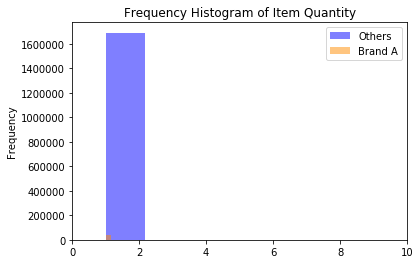

In [108]:
import matplotlib.pyplot as plt
%matplotlib inline

x1 = df.loc[df.BRAND_NAME =='DIGER', 'ITEM_QUANTITY']
x2 = df.loc[df.BRAND_NAME=='A', 'ITEM_QUANTITY']


kwargs = dict(alpha=0.5, bins = 50)

plt.hist(x1, **kwargs, color='b', label='Others')
plt.hist(x2, **kwargs, color='darkorange', label='Brand A')

plt.gca().set(title='Frequency Histogram of Item Quantity', ylabel='Frequency')
plt.xlim(0,10)
plt.legend();

### Item Unit Price

Unit price distribution of the items belonging to other brands are positively skewed with a median value of 1.19 TRY. However, average unit price of the items of brand A is 17.83 TRY (std =4.60). It is obvious that brand A's products are more expensive than the rest.

In [109]:
df[df.BRAND_NAME == "DIGER"]["ITEM_UNIT_PRICE"].describe()

count    1.695276e+06
mean     1.376047e+01
std      7.870091e+00
min      0.000000e+00
25%      8.900000e+00
50%      1.190000e+01
75%      1.650000e+01
max      8.995000e+01
Name: ITEM_UNIT_PRICE, dtype: float64

In [110]:
df[df.BRAND_NAME == "A"]["ITEM_UNIT_PRICE"].describe()

count    36365.000000
mean        17.834808
std          4.605865
min          6.900000
25%         13.900000
50%         18.500000
75%         19.950000
max         33.800000
Name: ITEM_UNIT_PRICE, dtype: float64

Text(0.5, 0, 'Unit Price (TRY)')

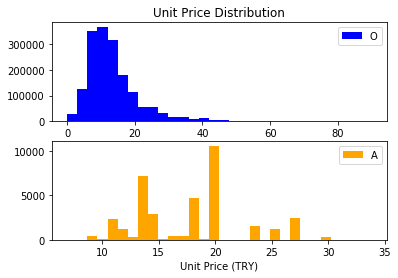

In [111]:
#fig, ax = plt.subplots((2, 1),figsize=(10, 8))
fig, (ax1, ax2) = plt.subplots(2)
ax1.hist(df[df.BRAND_NAME == "DIGER"]["ITEM_UNIT_PRICE"],bins=30, color="blue")#, alpha=0.5, ax=ax)
ax2.hist(df[df.BRAND_NAME == "A"]["ITEM_UNIT_PRICE"], bins=30, color="orange")#, alpha=0.5, ax=ax)
ax1.legend("O")
ax2.legend("A")
ax1.set_title('Unit Price Distribution')
ax2.set_xlabel('Unit Price (TRY)')

### Item ID

There are 1851 different items in hair products. Distribution of the top 10 items in hair products sold in Gratis is as follows. Item with 10013125 ID has the highest frequency.

In [112]:
len(df.ITEM_ID.unique())

1851

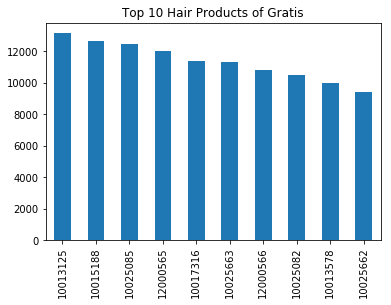

In [113]:
df.ITEM_ID.value_counts()[:10].plot(kind='bar', title = "Top 10 Hair Products of Gratis")

Brand A has 36 different hair products sold in Gratis.

In [114]:
len(df[df.BRAND_NAME == "A"].ITEM_ID.unique())

36

Distribution of A's top 10 products are as follows. Unfortunately none of them is listed in the top 10 hair products sold in Gratis.

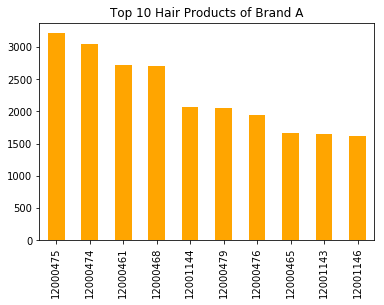

In [115]:
df[df.BRAND_NAME == "A"].ITEM_ID.value_counts()[:10].plot(kind='bar', color ="orange", title = "Top 10 Hair Products of Brand A")

### Brand Name

Only 2.1% of the brands belongs to brand A.

In [116]:
round(df.BRAND_NAME.value_counts()/len(df)*100,3)

DIGER    97.9
A         2.1
Name: BRAND_NAME, dtype: float64

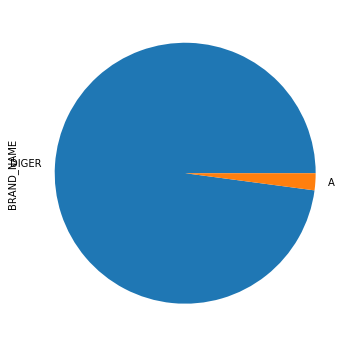

In [117]:
df.BRAND_NAME.value_counts().plot(kind='pie',figsize=(6, 6))


## Metrics

### Monthly Revenue

Assuming *Transaction Date* as invoice date, we can calculate the monthly revenue as follows:

---

Revenue = Active Customer Count * Order Count * Average Revenue per Order

---

When we plotted monthly revenue for all hair products sold in Gratis and Brand A, we observed the same seasonality. It is obvious that monthly revenue is growing. There are abrupt jumps in revenues, this might be due to campaigns of Gratis. After sudden increases in those so called campaign era, revenue slighly decreases with a linear trend. More probably there is no seperate campaign made for Brand A so it follows the same trend.


In [118]:
#creating YearMonth field for the ease of reporting and visualization
df['InvoiceYearMonth'] = df['TRX_DATE'].map(lambda date: 100*date.year + date.month)
#df['InvoiceYearMonth'] = df['InvoiceYearMonth'].astype(str) #required for true visualization
#calculate Revenue for each row and create a new dataframe with YearMonth - Revenue columns
df['Revenue'] = df['ITEM_UNIT_PRICE'] * df['ITEM_QUANTITY']
tx_revenue = df.groupby(['InvoiceYearMonth'])['Revenue'].sum().reset_index()
tx_revenue.head()


,InvoiceYearMonth,Revenue
0,201709,271441.300000
1,201710,629475.640000
2,201711,526596.390000
3,201712,766644.920001
4,201801,520568.950000


Generate the same feature for Brand A:

In [119]:
#creating YearMonth field for the ease of reporting and visualization
df_A['InvoiceYearMonth'] = df_A['TRX_DATE'].map(lambda date: 100*date.year + date.month)
#df_A['InvoiceYearMonth'] = df_A['InvoiceYearMonth'].astype(str) #required for true visualization
#calculate Revenue for each row and create a new dataframe with YearMonth - Revenue columns
df_A['Revenue'] = df_A['ITEM_UNIT_PRICE'] * df_A['ITEM_QUANTITY']
tx_revenue_A = df_A.groupby(['InvoiceYearMonth'])['Revenue'].sum().reset_index()
tx_revenue_A.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,InvoiceYearMonth,Revenue
0,201709,7845.33
1,201710,16267.85
2,201711,13109.06
3,201712,20124.40
4,201801,12983.80


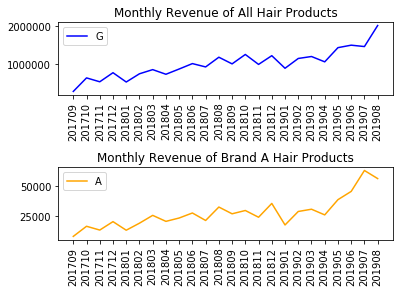

In [120]:
fig, (ax1, ax2) = plt.subplots(2)
ax1.plot(tx_revenue['InvoiceYearMonth'].astype(str),tx_revenue['Revenue'], color="blue")
ax2.plot(tx_revenue_A['InvoiceYearMonth'].astype(str),tx_revenue_A['Revenue'], color="orange")
ax1.legend("G")
ax2.legend("A")
ax1.set_title('Monthly Revenue of All Hair Products')
ax2.set_title('Monthly Revenue of Brand A Hair Products')
ax1.tick_params(axis ='x', rotation =90)
ax2.tick_params(axis ='x', rotation =90)
plt.subplots_adjust(hspace = 1)
#ax2.set_xlabel('Unit Price (TRY)')

### Monthly Revenue Growth Rate

Let's calculate the grow rate of the monthly revenue for hair products sold in Gratis.
Monthly growth % oscillates around a value slightly above 0 and seems stable. Notice that the amplitude of the oscillations are larger for Brand A when compared to rest, due to small sample size.

In [121]:
#using pct_change() function to see monthly percentage change
tx_revenue['MonthlyGrowth'] = tx_revenue['Revenue'].pct_change()

#showing first 5 rows
tx_revenue.head()

,InvoiceYearMonth,Revenue,MonthlyGrowth
0,201709,271441.300000,NaN
1,201710,629475.640000,1.319012
2,201711,526596.390000,-0.163436
3,201712,766644.920001,0.455849
4,201801,520568.950000,-0.320978


Since there is no reference value to compare the first entry of growth rate returns as NaN. It is further replaced with 0 (meaning no increase) for the sake of proper visualization.

In [0]:
import numpy as np
tx_revenue = tx_revenue.replace(np.nan, 0)

...and for Brand A. Following the same reasoning, miscalculated (NaN) rate replaced with 0.

In [123]:
#using pct_change() function to see monthly percentage change
tx_revenue_A['MonthlyGrowth'] = tx_revenue_A['Revenue'].pct_change()
tx_revenue_A = tx_revenue_A.replace(np.nan, 0)
#showing first 5 rows
tx_revenue_A

,InvoiceYearMonth,Revenue,MonthlyGrowth
0,201709,7845.33000,0.000000
1,201710,16267.85000,1.073571
2,201711,13109.06000,-0.194174
3,201712,20124.40000,0.535152
4,201801,12983.80000,-0.354823
5,201802,18838.20000,0.450900
6,201803,25353.27000,0.345844
7,201804,20359.53000,-0.196966
8,201805,23153.49000,0.137231
9,201806,27329.80000,0.180375


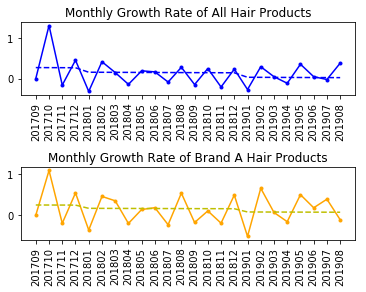

Trendline Equation for All Hair Products: y=-0.001257x+253.808406
Trendline Equation for All Hair Products: y=-0.000872x+176.217366


In [124]:
import numpy as np
fig, (ax1, ax2) = plt.subplots(2)

#plot of Gratis
ax1.plot(tx_revenue['InvoiceYearMonth'].astype(str),tx_revenue['MonthlyGrowth'], color="blue", linestyle='-', marker='.')

# add trendline
x = tx_revenue['InvoiceYearMonth']
y = tx_revenue['MonthlyGrowth']
z = np.polyfit(x.astype(float) , y, 1)
p = np.poly1d(z)
ax1.plot(x.astype(str),p(x),"b--")


#plot for Brand A
ax2.plot(tx_revenue_A['InvoiceYearMonth'].astype(str),tx_revenue_A['MonthlyGrowth'], color="orange", linestyle='-', marker='.')
# add trendline
x_A = tx_revenue_A['InvoiceYearMonth']
y_A = tx_revenue_A['MonthlyGrowth']
z_A = np.polyfit(x_A.astype(float), y_A, 1)
p = np.poly1d(z_A)
ax2.plot(x_A.astype(str),p(x_A),"y--")

# style related things
ax1.set_title('Monthly Growth Rate of All Hair Products')
ax2.set_title('Monthly Growth Rate of Brand A Hair Products')
ax1.tick_params(axis ='x', rotation =90)
ax2.tick_params(axis ='x', rotation =90)
plt.subplots_adjust(hspace = 1)
plt.show()

print("Trendline Equation for All Hair Products:","y=%.6fx+%.6f"%(z[0],z[1])) 
print("Trendline Equation for All Hair Products:","y=%.6fx+%.6f"%(z_A[0],z_A[1]))


We observe an nearly monthly oscillating behaviour of growth rate. This might be related to campaign frequency (in every 2 months?). Both of the growth rates are in the decreasing trend but Brand A's rate decreases slower than the rest. By the end of August, 2019, we saw monthly growth is decreased by 10.7% for Brand A wheras it is increased by 38.1% for overall hair products in Gratis. Monthly revenue also decreased for Brand A in August, 2019 while it increased for other hair products. We think that this is due to customers opting for cheaper option. Reming that Brand A's hair products are way expesive than the others and sunlight's and sea water's descructive effects requires people to apply extensive hair care in the summer season. They could have opted out for cheaper or UV resistant options which Brand A cannot provide.
There is a sudden increase in growth for Brand A from January, 2019 to February, 2019 (+64%). After May 2019, growth rate behaves positively. This might be due to discounts of Mother's Day and Ramadan Holliday done in May.

In [125]:
print(tx_revenue_A[len(tx_revenue_A)-1:])
print(tx_revenue[len(tx_revenue)-1:])

    InvoiceYearMonth   Revenue  MonthlyGrowth
23            201908  55998.77      -0.107371
    InvoiceYearMonth       Revenue  MonthlyGrowth
23            201908  2.015467e+06        0.38142


### Monthly Active Customers

We can get the monthly active customers by counting unique customer IDs (Using nunique() function we will count distinct observations). We will be focusing on Brand A from now on. 

In [126]:
#creating a new dataframe with UK customers only
tx_A = df.query("BRAND_NAME == 'A'").reset_index(drop=True)

#creating monthly active customers dataframe by counting unique Customer IDs
tx_monthly_active = tx_A.groupby('InvoiceYearMonth')['CUST_ID'].nunique().reset_index()

#print the dataframe
tx_monthly_active

,InvoiceYearMonth,CUST_ID
0,201709,532
1,201710,1042
2,201711,912
3,201712,1327
4,201801,777
5,201802,1224
6,201803,1686
7,201804,1232
8,201805,1434
9,201806,1731


Number of active customers of Brand A first decreased from 1742 to 663 then increased to 1349 from December, 2019 to February 2019 (-61.94, +103.47%). This manifest itself as an abrupt jump in the growth rate. Number of active customers were obviously high for December and February due to New Year's Eve and Valantine's Day discounts. This high trend kept later for March by the help of Women's Day discount. After a decrease for April, then came the Mother's Day discount in May.

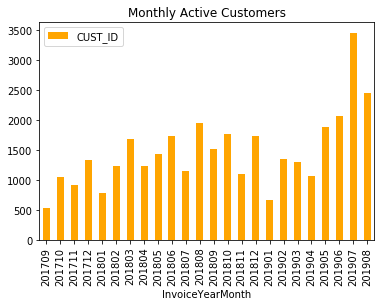

In [127]:
tx_monthly_active.plot(kind='bar', x = "InvoiceYearMonth", y = "CUST_ID",
                       color ="orange", title = "Monthly Active Customers")

### Monthly Order Count

Summing values in the quantity field we obtain order count for each month.

In [128]:
#create a new dataframe for no. of order by using quantity field
tx_monthly_sales = tx_A.groupby('InvoiceYearMonth')['ITEM_QUANTITY'].sum().reset_index()

#print the dataframe
tx_monthly_sales

,InvoiceYearMonth,ITEM_QUANTITY
0,201709,543.0
1,201710,1059.0
2,201711,937.0
3,201712,1354.0
4,201801,790.0
5,201802,1256.0
6,201803,1718.0
7,201804,1243.0
8,201805,1465.0
9,201806,1782.0


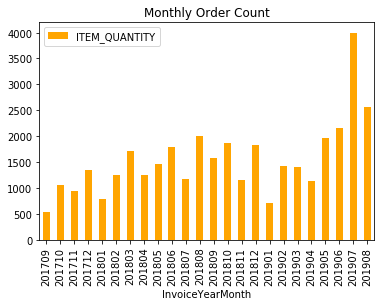

In [129]:
tx_monthly_sales.plot(kind='bar', x = "InvoiceYearMonth", y = "ITEM_QUANTITY",
                       color ="orange", title = "Monthly Order Count")

We see the same trend for number of orders so number of active customers directly affects order count.
We also searched Google Trends for the for discount keywords within in the transaction timespan of the dataset.
[See Interest over time on Google Trends for "gratis indirim" - Turkey, 06/09/2017 - 29/08/2019](https://trends.google.com.tr/trends/explore?date=2017-09-06%202019-08-29&geo=TR&q=gratis%20indirim). The popularity of those keywords peaks at 14-20 October, 2018 and 23-29 June, 2019. We strongly believe that Gratis had gone a campaign in those era, so that explains the peak at June, 2019.

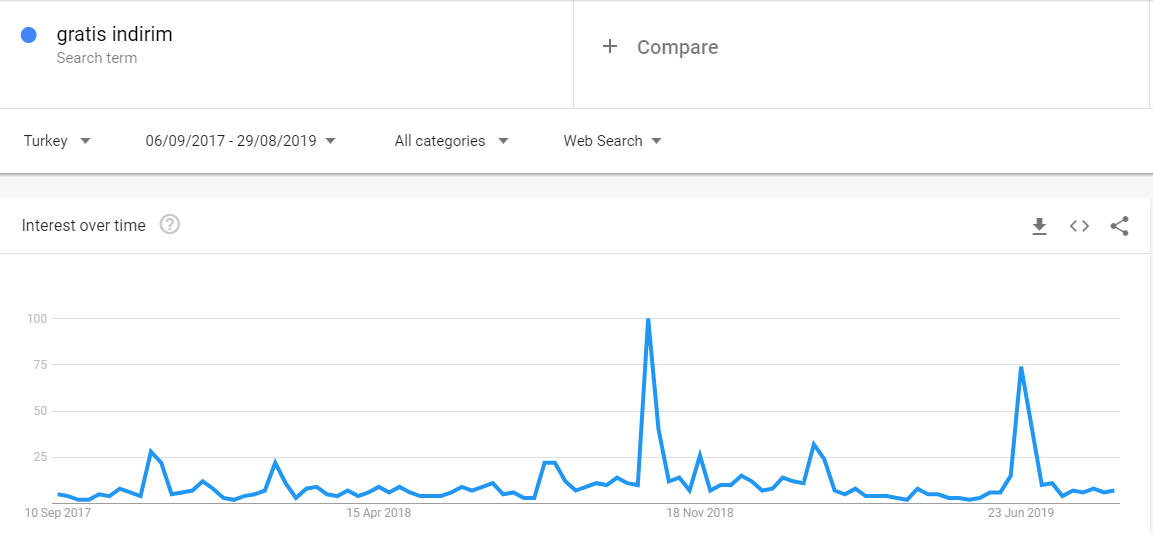

In [130]:
from IPython.display import Image, display
display(Image('/content/drive/My Drive/Gratis/Google_Trends.png'))

### Average Revenue per Order

We also calculated the average of revenue for each month.

In [131]:
# create a new dataframe for average revenue by taking the mean of it
tx_monthly_order_avg = tx_A.groupby('InvoiceYearMonth')['Revenue'].mean().reset_index()

#print the dataframe
tx_monthly_order_avg

,InvoiceYearMonth,Revenue
0,201709,14.691629
1,201710,15.537584
2,201711,14.280022
3,201712,15.097074
4,201801,16.624584
5,201802,15.241262
6,201803,14.948862
7,201804,16.432228
8,201805,16.023176
9,201806,15.563667


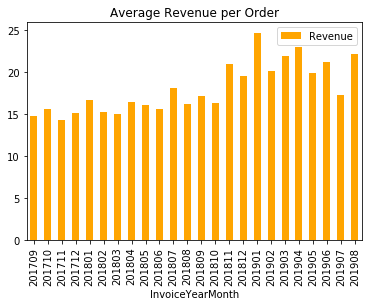

In [132]:
tx_monthly_order_avg.plot(kind='bar', x = "InvoiceYearMonth", y = "Revenue",
                       color ="orange", title = "Average Revenue per Order")

Even though active customer and order count peaked at July 2019, we donot observe the same behaviour in the revenue for Brand A. Customers must be active buying their needs only during the campaign season and de-active for the rest of the month.

### New Customer Ratio

We will be using this metric to check whether we are loosing existing customers or unable to atrack new ones. For the sake of simplicity we define new customer as whoever did the first purchase in the time window of one mount. If the customer makes its first purchase

In [133]:
tx_A['MinPurchaseYearMonth'] = tx_A['FIRST_TRANS_DATE'].map(lambda date: 100*date.year + date.month)
tx_A.head()

,CUST_ID,RTL_TRANS_ID,TRX_DATE,ITEM_QUANTITY,ITEM_UNIT_PRICE,ITEM_ID,BRAND_NAME,FIRST_TRANS_DATE,LAST_TRANS_DATE,InvoiceYearMonth,Revenue,MinPurchaseYearMonth
0,100010,01114000022017101617382167,2017-10-16 17:38:12,1.0,12.50,12000474,A,2017-10-09 15:00:00,2019-08-26 15:00:00,201710,12.50,201710
1,1000179,01066000032017100218577142,2017-10-02 18:57:46,1.0,18.50,12000460,A,2017-09-20 15:00:00,2019-08-21 15:00:00,201710,18.50,201709
2,1000222,01046000032018042220204223,2018-04-22 20:20:29,1.0,13.90,12001143,A,2018-04-22 15:00:00,2019-07-17 15:00:00,201804,13.90,201804
3,1000280,01378000012019071515204230,2019-07-15 15:20:25,1.0,10.95,12000474,A,2017-10-03 15:00:00,2019-08-07 15:00:00,201907,10.95,201710
4,100031,01515000012019080610393025,2019-08-06 10:39:19,1.0,19.95,12000475,A,2017-09-23 15:00:00,2019-08-21 15:00:00,201908,19.95,201709


According to our calculations we have found 4484 new and 31881 new customers for Brand A.

In [135]:
#create a column called User Type and assign Existing 
#if User's First Purchase Year Month before the selected Invoice Year Month
tx_A['UserType'] = 'New'
tx_A.loc[tx_A['InvoiceYearMonth']>tx_A['MinPurchaseYearMonth'],'UserType'] = 'Existing'
tx_A["UserType"].value_counts()

Existing    31881
New          4484
Name: UserType, dtype: int64

Now, we will look at the revenue breakdown for each group monthly.

In [137]:
#calculate the Revenue per month for each user type
tx_user_type_revenue = tx_A.groupby(['InvoiceYearMonth','UserType'])['Revenue'].sum().reset_index()
tx_user_type_revenue

,InvoiceYearMonth,UserType,Revenue
0,201709,New,7845.33000
1,201710,Existing,4966.81000
2,201710,New,11301.04000
3,201711,Existing,8065.00000
4,201711,New,5044.06000
5,201712,Existing,14544.90000
6,201712,New,5579.50000
7,201801,Existing,10267.90000
8,201801,New,2715.90000
9,201802,Existing,15931.90000


Revenue per month for new and existing customers of Brand A:

In [161]:
#filtering the dates for the 1st month because all customers are New in that month acc to our calculation
tx_user_type_revenue = tx_user_type_revenue.query("InvoiceYearMonth != 201709 and InvoiceYearMonth != 201709")
tx_user_type_revenue.tail()

,InvoiceYearMonth,UserType,Revenue
42,201906,New,1088.50
43,201907,Existing,59231.89
44,201907,New,3502.74
45,201908,Existing,43643.72
46,201908,New,12355.05


Existing customers of Brand A are showing a positive trend until July, 2019 but decreases in August. Still, we can assume that the customer base is growing. New customers have a slight negative trend until May, 2019. Hopefully it shows a positive trend after that month. But still we saw an decreasing trend for monthly revenue and growth rate in our previous plots, because Brand A's core customers are existing customers which outnumbers the new ones and their behaviour dominates. We previously discussed about the possibility of their opting for cheaper hair care products in that specific month. May be a special loyalty program for Brand A works.

Text(0.5, 0, 'Year-Month')

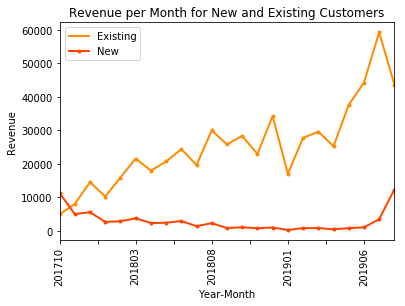

In [165]:
fig, ax = plt.subplots(1, 1)
tx_user_type_revenue["InvoiceYearMonth"] =tx_user_type_revenue["InvoiceYearMonth"].astype(str)
tx_user_type_revenue[tx_user_type_revenue.UserType == "Existing"].plot(x = "InvoiceYearMonth",
                                                                            y = "Revenue",
                                                                            color = "darkorange",
                                                                            label = "Existing",
                                                                            marker='.',
                                                                            linewidth=2,
                                                                            alpha=1, ax=ax)
tx_user_type_revenue[tx_user_type_revenue.UserType == "New"].plot(x = "InvoiceYearMonth",
                                                                       y = "Revenue",
                                                                       color="orangered",
                                                                       label = "New",
                                                                       marker='.',
                                                                       linewidth=2,
                                                                      alpha=1, ax=ax)
ax.tick_params(axis ='x', rotation =90)
ax.set_visible(True)
ax.set_title('Revenue per Month for New and Existing Customers')
ax.set_ylabel('Revenue')
ax.set_xlabel('Year-Month')
# set ticks visible, if using sharex = True. Not needed otherwise


## References

1. [Know Your Metrics](https://towardsdatascience.com/data-driven-growth-with-python-part-1-know-your-metrics-812781e66a5b)
2. [Find Your Best Customers with Customer Segmentation in Python](https://towardsdatascience.com/find-your-best-customers-with-customer-segmentation-in-python-61d602f9eee6)
3. [İndirim Oranı Belli Oldu! İşte 2019 Gratis İndirim Günleri](https://www.modaizle.com/indirim-orani-belli-oldu-iste-2019-gratis-indirim-gunleri/)
4. [Gratis 2018 yılbaşı indirimleri 22-31 Aralık](https://kampanyabul.org/magaza-market-kampanyalari/gratis-2018-yilbasi-indirimleri-22-31-aralik.html)
5. [Gratis Şubat indirim kataloğu 2019! Sevgililer günü indirimi başladı mı?](https://www.superhaber.tv/gratis-subat-indirim-katalogu-2019-gratis-sevgililer-gunu-indirimi-basladi-mi-gratis-indirimi-ne-zamana-kadar-hangi-urunlerde-haber-172777)